In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Pokemon.csv')

In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


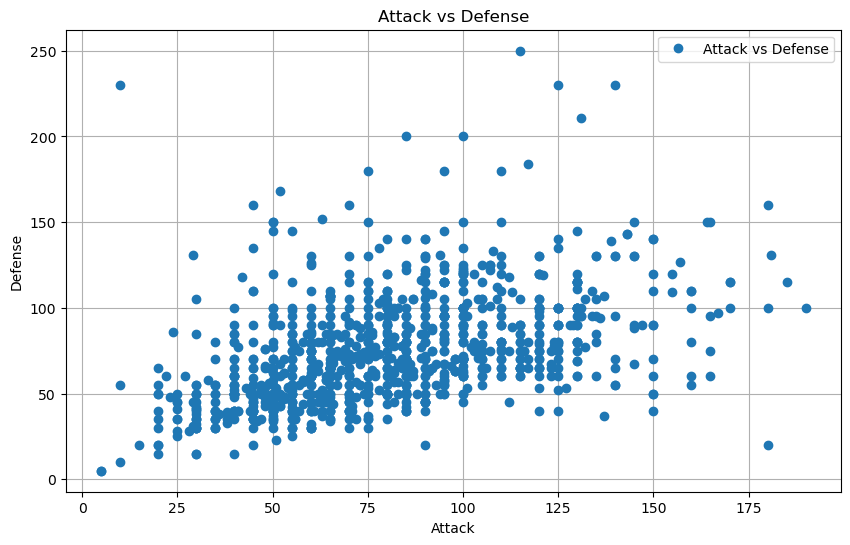

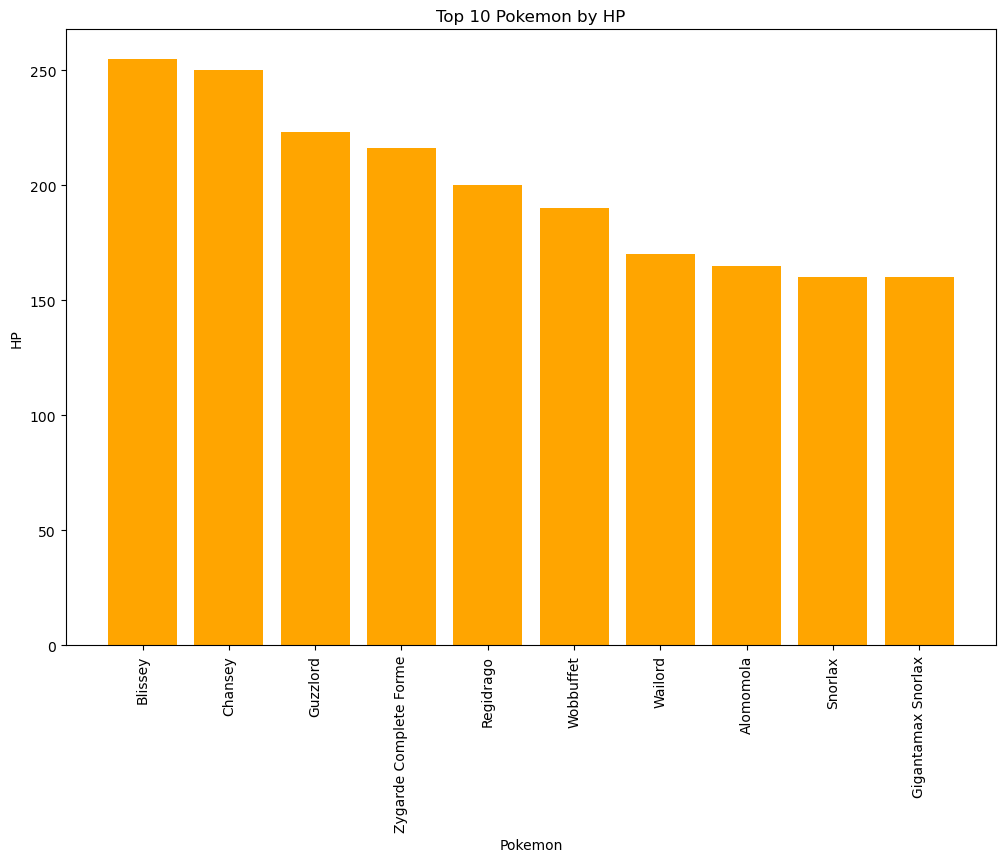

In [5]:
import matplotlib.pyplot as plt
# Line Plot
plt.figure(figsize=(10, 6))
plt.plot(df['attack'], df['defense'], 'o', label='Attack vs Defense')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.title('Attack vs Defense')
plt.legend()
plt.grid(True)
plt.show()

# Bar Plot (misalnya, total HP of top 10 Pokemon)
top_10_pokemon = df.nlargest(10, 'hp')
plt.figure(figsize=(12, 8))
plt.bar(top_10_pokemon['name'], top_10_pokemon['hp'], color='orange')
plt.xlabel('Pokemon')
plt.ylabel('HP')
plt.title('Top 10 Pokemon by HP')
plt.xticks(rotation=90)
plt.show()

C:\Users\farhan\AppData\Local\Temp\ipykernel_11200\359087097.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Element', y='Number of Pokémon', data=type_counts, palette='viridis')


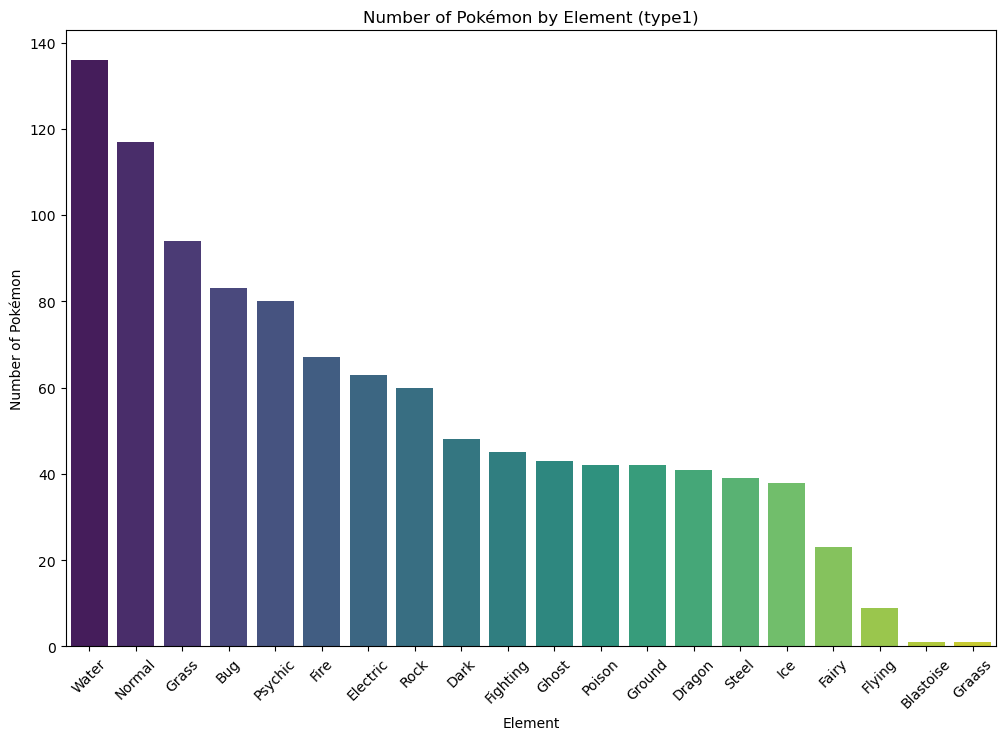

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Memuat data
df = pd.read_csv('Pokemon.csv')

# Hitung jumlah Pokémon per elemen
type_counts = df['type1'].value_counts().reset_index()
type_counts.columns = ['Element', 'Number of Pokémon']

# Plot Bar dengan Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Element', y='Number of Pokémon', data=type_counts, palette='viridis')
plt.xlabel('Element')
plt.ylabel('Number of Pokémon')
plt.title('Number of Pokémon by Element (type1)')
plt.xticks(rotation=45)
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  1072 non-null   int64  
 1   Unnamed: 0    1072 non-null   int64  
 2   number        1072 non-null   int64  
 3   name          1072 non-null   object 
 4   type1         1072 non-null   object 
 5   type2         574 non-null    object 
 6   total         1072 non-null   int64  
 7   hp            1037 non-null   float64
 8   attack        1070 non-null   float64
 9   defense       1072 non-null   int64  
 10  sp_attack     1043 non-null   float64
 11  sp_defense    1072 non-null   int64  
 12  speed         1072 non-null   int64  
 13  generation    1072 non-null   int64  
 14  legendary     964 non-null    object 
dtypes: float64(3), int64(8), object(4)
memory usage: 125.8+ KB


In [8]:
df.head()

,Unnamed: 0.1,Unnamed: 0,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,0,415,337,Lunatone,Rock,Psychic,440,70.0,55.0,65,95.0,85,70,3,False
1,1,463,380,Latias,Dragon,Psychic,600,80.0,80.0,90,110.0,130,110,3,True
2,2,179,131,Gigantamax Lapras,Water,Ice,535,130.0,85.0,80,85.0,95,60,1,False
3,3,526,432,Purugly,Normal,NaN,452,71.0,82.0,64,64.0,59,112,4,False
4,4,195,144,Articuno,Ice,Flying,580,90.0,85.0,100,95.0,125,85,1,True


In [9]:
df.isna().sum()

Unnamed: 0.1      0
Unnamed: 0        0
number            0
name              0
type1             0
type2           498
total             0
hp               35
attack            2
defense           0
sp_attack        29
sp_defense        0
speed             0
generation        0
legendary       108
dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder

In [11]:
# Drop the 'Transaction ID' column if it is not useful
df = df.drop(columns=['Unnamed: 0.1'])
df = df.drop(columns=['Unnamed: 0'])

In [12]:
df.head()

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,337,Lunatone,Rock,Psychic,440,70.0,55.0,65,95.0,85,70,3,False
1,380,Latias,Dragon,Psychic,600,80.0,80.0,90,110.0,130,110,3,True
2,131,Gigantamax Lapras,Water,Ice,535,130.0,85.0,80,85.0,95,60,1,False
3,432,Purugly,Normal,NaN,452,71.0,82.0,64,64.0,59,112,4,False
4,144,Articuno,Ice,Flying,580,90.0,85.0,100,95.0,125,85,1,True


In [13]:
print(df.shape)

(1072, 13)


In [14]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['number'])
categorical_cols = df.select_dtypes(include=['object'])

In [15]:
from sklearn.impute import KNNImputer

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=3)

#Fit the imputer on the dataset and transform it to fill missing values
imp_data = imputer.fit_transform(numerical_cols)

# Convert the result back to a DataFrame
df_imp = pd.DataFrame(imp_data, columns=numerical_cols.columns)

In [16]:
df_final = pd.concat([df_imp, categorical_cols], axis=1)

In [17]:
df_final.head()

,number,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,name,type1,type2,legendary
0,337.0,440.0,70.0,55.0,65.0,95.0,85.0,70.0,3.0,Lunatone,Rock,Psychic,False
1,380.0,600.0,80.0,80.0,90.0,110.0,130.0,110.0,3.0,Latias,Dragon,Psychic,True
2,131.0,535.0,130.0,85.0,80.0,85.0,95.0,60.0,1.0,Gigantamax Lapras,Water,Ice,False
3,432.0,452.0,71.0,82.0,64.0,64.0,59.0,112.0,4.0,Purugly,Normal,NaN,False
4,144.0,580.0,90.0,85.0,100.0,95.0,125.0,85.0,1.0,Articuno,Ice,Flying,True


In [18]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   number      1072 non-null   float64
 1   total       1072 non-null   float64
 2   hp          1072 non-null   float64
 3   attack      1072 non-null   float64
 4   defense     1072 non-null   float64
 5   sp_attack   1072 non-null   float64
 6   sp_defense  1072 non-null   float64
 7   speed       1072 non-null   float64
 8   generation  1072 non-null   float64
 9   name        1072 non-null   object 
 10  type1       1072 non-null   object 
 11  type2       574 non-null    object 
 12  legendary   964 non-null    object 
dtypes: float64(9), object(4)
memory usage: 109.0+ KB


In [19]:
# Encode categorical features
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_final['name'] = label_encoder.fit_transform(df['name'])
df_final['type1'] = label_encoder.fit_transform(df['type1'])
df_final['type2'] = label_encoder.fit_transform(df['type2'])
df_final['legendary'] = label_encoder.fit_transform(df['legendary'])

In [20]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   number      1072 non-null   float64
 1   total       1072 non-null   float64
 2   hp          1072 non-null   float64
 3   attack      1072 non-null   float64
 4   defense     1072 non-null   float64
 5   sp_attack   1072 non-null   float64
 6   sp_defense  1072 non-null   float64
 7   speed       1072 non-null   float64
 8   generation  1072 non-null   float64
 9   name        1072 non-null   int32  
 10  type1       1072 non-null   int32  
 11  type2       1072 non-null   int32  
 12  legendary   1072 non-null   int32  
dtypes: float64(9), int32(4)
memory usage: 92.3 KB


In [50]:
df_select = df_final[['total',
                      'hp',
                      'attack',
                      'defense',
                      'sp_attack',
                      'sp_defense',
                      'speed',
                      'generation',
                      'legendary'
]]

In [52]:
# Separate
train_df = df_select.iloc[:964,:]
test_df = df_select.iloc[964:,:8]

In [53]:
x = train_df.drop('legendary', axis=1)
y = train_df['legendary'].astype('category').cat.codes

In [54]:
from sklearn.model_selection import train_test_split
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2, 
                                                    random_state=123)

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC  # Import SVC

# Load or prepare your dataset here
# X_train, X_test, y_train, y_test = ...

# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Train Logistic Regression Classifier
logistic_model = LogisticRegression(random_state=42)  # Change to Logistic Regression
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# Train SVC Classifier
svc_model = SVC(kernel='linear', random_state=42)  # Change to SVC
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

# Evaluate models
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_logistic)
accuracy_svc = accuracy_score(y_test, y_pred_svc)

print(f'Akurasi Decision Tree: {accuracy_dt}')
print(f'Akurasi Logistik {accuracy_rf}')
print(f'Akurasi SVC: {accuracy_svc}')

print("Laporan Klasifikasi Decision Tree:\n", classification_report(y_test, y_pred_dt))
print("Laporan Klasifikasi Logistik:\n", classification_report(y_test, y_pred_logistic))
print("Laporan Klasifikasi SVC:\n", classification_report(y_test, y_pred_svc))


c:\Users\farhan\anaconda3\envs\dateng\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Akurasi Decision Tree: 0.9326424870466321
Akurasi Logistik 0.8860103626943006
Akurasi SVC: 0.9481865284974094
Laporan Klasifikasi Decision Tree:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       173
           1       0.67      0.70      0.68        20

    accuracy                           0.93       193
   macro avg       0.82      0.83      0.82       193
weighted avg       0.93      0.93      0.93       193

Laporan Klasifikasi Logistik:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       173
           1       0.25      0.05      0.08        20

    accuracy                           0.89       193
   macro avg       0.57      0.52      0.51       193
weighted avg       0.83      0.89      0.85       193

Laporan Klasifikasi SVC:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       173
           1       0.86      0.60 

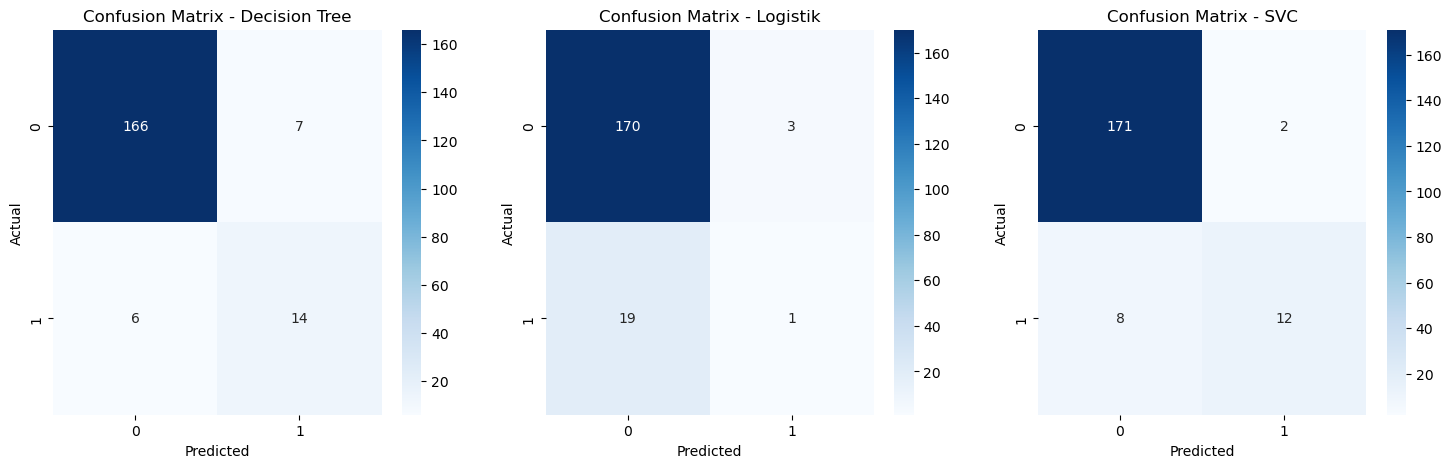

In [56]:
# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_lg = confusion_matrix(y_test, y_pred_logistic)
cm_svc = confusion_matrix(y_test, y_pred_svc)

# Plot confusion matrix
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(cm_dt, annot=True, fmt='d', ax=ax[0], cmap='Blues')
ax[0].set_title('Confusion Matrix - Decision Tree')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(cm_lg, annot=True, fmt='d', ax=ax[1], cmap='Blues')
ax[1].set_title('Confusion Matrix - Logistik')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

sns.heatmap(cm_svc, annot=True, fmt='d', ax=ax[2], cmap='Blues')
ax[2].set_title('Confusion Matrix - SVC')
ax[2].set_xlabel('Predicted')
ax[2].set_ylabel('Actual')

plt.show()

In [57]:
from sklearn.svm import SVC

# Train SVC Classifier with probability=True
svc_model = SVC(kernel='linear', random_state=42, probability=True)  # Ensure probability=True
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)


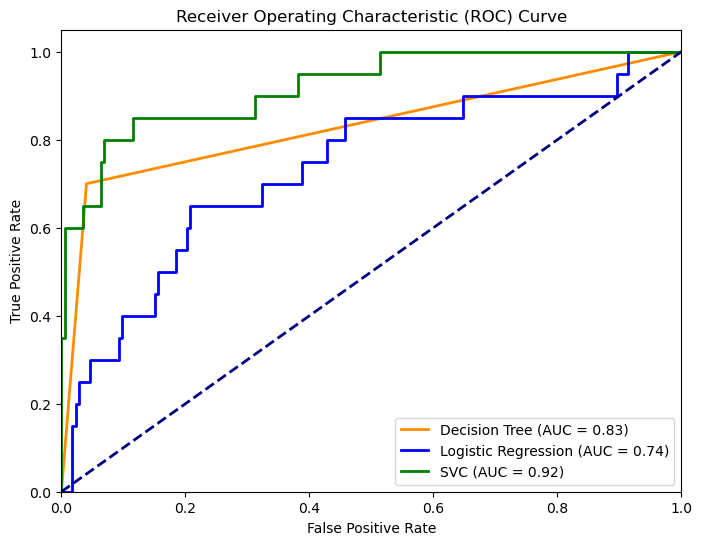

In [58]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_model.predict_proba(X_test)[:,1])
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_logistic, tpr_logistic, _ = roc_curve(y_test, logistic_model.predict_proba(X_test)[:,1])
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

fpr_svc, tpr_svc, _ = roc_curve(y_test, svc_model.predict_proba(X_test)[:,1])
roc_auc_svc = auc(fpr_svc, tpr_svc)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_logistic, tpr_logistic, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_logistic:.2f})')
plt.plot(fpr_svc, tpr_svc, color='green', lw=2, label=f'SVC (AUC = {roc_auc_svc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


MODEL 1

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [74]:
modelfix =SVC(kernel='linear', random_state=42)  # Change to SVC
modelfix.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

In [75]:
y_pred = modelfix.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       173
           1       0.86      0.60      0.71        20

    accuracy                           0.95       193
   macro avg       0.91      0.79      0.84       193
weighted avg       0.95      0.95      0.94       193



In [76]:
from sklearn.preprocessing import StandardScaler
import numpy as np
# Misalkan Anda memiliki DataFrame `df` dengan fitur-fitur yang perlu dinormalisasi
scaler = StandardScaler()

In [77]:
import numpy as np

input_data = (440, 70, 55, 65,  95, 85, 70,3)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1, -1)


prediction = modelfix.predict(input_data_reshape)
print(prediction)

if (prediction[0] == 0):
    print('Bukan Pokemon Lagendary')
else:
    print('Pokemon Legendary')

[0]
Bukan Pokemon Lagendary


c:\Users\farhan\anaconda3\envs\dateng\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [66]:
import pickle

In [78]:
filename = 'Pokemon_model.sav'
pickle.dump(modelfix,open(filename,'wb'))